In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBClassifier
from sklearn.utils import shuffle

In [64]:
df = pd.read_csv("diabetes.csv")

In [65]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [67]:
results = {
    "LightGBM": [],
    "XGBoost": [],
    "ANN": [],
    "SVM": [],
    "DNN": []
}

In [68]:
lgbm_model = LGBMClassifier(
            
    learning_rate=0.05,      
    max_depth=7,            
    num_leaves=31,           
    min_child_samples=20,    
    subsample=0.8,           
    colsample_bytree=0.8,    
    random_state=42)
for iteration in range(1, 101):  # 1 to 100 iterations
    lgbm_model.n_estimators = iteration
    lgbm_model.fit(X_train, y_train)
    y_pred = lgbm_model.predict(X_test)
    results["LightGBM"].append(accuracy_score(y_test, y_pred))

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightG

In [69]:
xgb_model = XGBClassifier(
    
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    random_state=42
)
for iteration in range(1, 101):  # 1 to 100 iterations
    xgb_model.n_estimators = iteration
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    results["XGBoost"].append(accuracy_score(y_test, y_pred))

In [70]:
ann_model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = ann_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)
results["ANN"] = history.history['val_accuracy']

c:\Users\16521\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
for iteration in range(1, 101):  # Simulate iterations with repeated fitting
    # Use a subsample of data for iteration effect
    subset_size = int(len(X_train) * iteration / 100)
    svm_model.fit(X_train[:subset_size], y_train[:subset_size])
    y_pred = svm_model.predict(X_test)
    results["SVM"].append(accuracy_score(y_test, y_pred))

In [72]:
print(results)

{'LightGBM': [0.6493506493506493, 0.6493506493506493, 0.6493506493506493, 0.6493506493506493, 0.6493506493506493, 0.6688311688311688, 0.7142857142857143, 0.7142857142857143, 0.7077922077922078, 0.7142857142857143, 0.7077922077922078, 0.7142857142857143, 0.7012987012987013, 0.7077922077922078, 0.7272727272727273, 0.7337662337662337, 0.7402597402597403, 0.7532467532467533, 0.7467532467532467, 0.7532467532467533, 0.7532467532467533, 0.7662337662337663, 0.7467532467532467, 0.7402597402597403, 0.7402597402597403, 0.7402597402597403, 0.7662337662337663, 0.7597402597402597, 0.7662337662337663, 0.7662337662337663, 0.7662337662337663, 0.7662337662337663, 0.7662337662337663, 0.7597402597402597, 0.7597402597402597, 0.7662337662337663, 0.7662337662337663, 0.7662337662337663, 0.7662337662337663, 0.7597402597402597, 0.7597402597402597, 0.7662337662337663, 0.7662337662337663, 0.7597402597402597, 0.7597402597402597, 0.7662337662337663, 0.7597402597402597, 0.7597402597402597, 0.7662337662337663, 0.7662

In [73]:
DNN_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  
    Dense(32, activation='relu'),  
    Dense(16, activation='relu'), 
    Dense(1, activation='sigmoid')
])
DNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = DNN_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)
results["DNN"] = history.history['val_accuracy']

c:\Users\16521\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


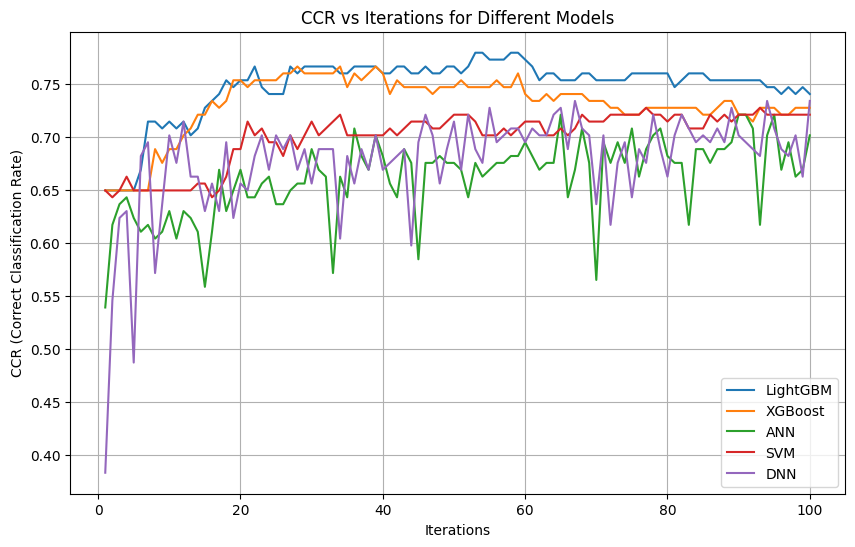

In [74]:
iterations = range(1, 101)

plt.figure(figsize=(10, 6))


for model, ccr_values in results.items():
    if not ccr_values: 
        results[model] = [0] * len(iterations)  
    elif len(ccr_values) < len(iterations):  
        results[model] += [ccr_values[-1]] * (len(iterations) - len(ccr_values)) 
    elif len(ccr_values) > len(iterations):  
        results[model] = ccr_values[:len(iterations)]  


for model, ccr_values in results.items():
    plt.plot(iterations, ccr_values, label=model)

plt.title("CCR vs Iterations for Different Models")
plt.xlabel("Iterations")
plt.ylabel("CCR (Correct Classification Rate)")
plt.legend()
plt.grid(True)
plt.show()